<a href="https://colab.research.google.com/github/ChizobaNzeakor/lagos-waste-analysis/blob/main/lagos_nigeria_waste_infrastructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Work #3:

In [ ]:
!pip install osmnx geopandas matplotlib shapely mapclassify


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.9/99.9 kB 9.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 59.1/59.1 kB 6.3 MB/s eta 0:00:00


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.9/99.9 kB 1.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 59.1/59.1 kB 1.6 MB/s eta 0:00:00
                                            geometry  bbox_west  bbox_south  \
0  POLYGON ((2.70598 6.42129, 2.70636 6.40298, 2....   2.705985    6.366684   

   bbox_east  bbox_north  place_id  osm_type   osm_id       lat     lon  \
0   4.350906    6.696796  36895467  relation  3718182  6.526903  3.5774   

      class            type  place_rank  importance addresstype         name  \
0  boundary  administrative           8    0.542281        city  Lagos State   

           display_name  
0  Lagos State, Nigeria  


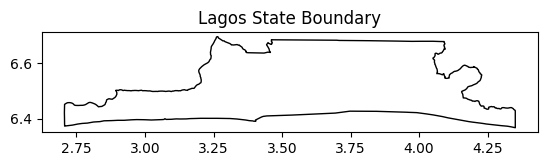

In [ ]:

# ‚úÖ First, install all the necessary packages
!pip install osmnx geopandas matplotlib shapely mapclassify --quiet

# ‚úÖ Then, import them
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from shapely.geometry import Polygon
from osmnx.features import features_from_polygon



# Define the place name for Lagos State
place_name = "Lagos State, Nigeria"

# Fetch the boundary polygon for Lagos State
lagos_boundary = ox.geocoder.geocode_to_gdf(place_name)

# Display the first few rows of the GeoDataFrame
print(lagos_boundary.head())

# Plot the boundary
lagos_boundary.plot(edgecolor='black', facecolor='none')
plt.title("Lagos State Boundary")
plt.show()



In [ ]:
wider_tags = {
    "amenity": ["waste_disposal", "recycling", "waste_basket", "waste_transfer_station"],
    "man_made": ["wastewater_plant"],
    "landuse": ["landfill"]
}



In [ ]:
# Use previously fetched lagos_boundary
lagos_polygon = lagos_boundary.geometry.iloc[0]



In [ ]:
# Initialize GeoDataFrame
waste_sites_expanded = gpd.GeoDataFrame()


In [ ]:
# Drop duplicates just in case
waste_sites_expanded = waste_sites_expanded.drop_duplicates(subset='geometry')

# Output the results
print(f"‚úÖ Total waste-related facilities fetched: {len(waste_sites_expanded)}")
waste_sites_expanded.head()



‚úÖ Total waste-related facilities fetched: 1


geometry         amenity  \
element id                                                    
node    6988054368  POINT (3.38906 6.49474)  waste_disposal   

                                                 name                 waste  
element id                                                                   
node    6988054368  Baale Towe Waste Collection Point  Solid Waste Disposal

In [ ]:
# Reproject both layers to UTM Zone 31N (EPSG:32631) for accurate meters
waste_sites_proj = waste_sites_expanded.to_crs(epsg=32631)
lagos_boundary_proj = lagos_boundary.to_crs(epsg=32631)


In [ ]:
# Create buffer zones in meters
buffer_500m = waste_sites_proj.buffer(500).unary_union
buffer_1km = waste_sites_proj.buffer(1000).unary_union
buffer_2km = waste_sites_proj.buffer(2000).unary_union


<ipython-input-32-95e78c74a0a0>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_500m = waste_sites_proj.buffer(500).unary_union
<ipython-input-32-95e78c74a0a0>:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_1km = waste_sites_proj.buffer(1000).unary_union
<ipython-input-32-95e78c74a0a0>:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_2km = waste_sites_proj.buffer(2000).unary_union


In [ ]:
buffer_gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=32631)
buffer_gdf_1km = gpd.GeoDataFrame(geometry=[buffer_1km], crs=32631)
buffer_gdf_2km = gpd.GeoDataFrame(geometry=[buffer_2km], crs=32631)


<ipython-input-34-3526354ccc67>:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


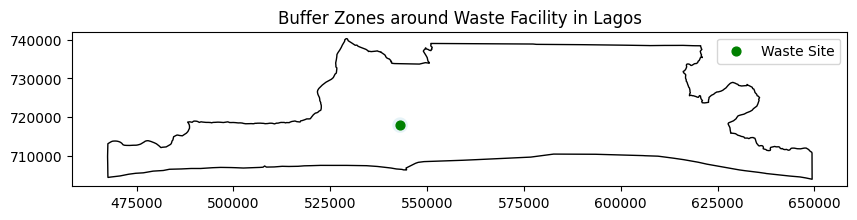

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
lagos_boundary_proj.plot(ax=ax, facecolor='none', edgecolor='black')
buffer_gdf_2km.plot(ax=ax, color='lightblue', alpha=0.3, label='2km Buffer')
buffer_gdf_1km.plot(ax=ax, color='blue', alpha=0.3, label='1km Buffer')
buffer_gdf_500m.plot(ax=ax, color='darkblue', alpha=0.5, label='500m Buffer')
waste_sites_proj.plot(ax=ax, color='green', markersize=40, label='Waste Site')

plt.legend()
plt.title("Buffer Zones around Waste Facility in Lagos")
plt.show()


In [ ]:
# Subtract the 2km buffer from Lagos area
blind_spots_2km = lagos_boundary_proj.overlay(buffer_gdf_2km, how='difference')


<ipython-input-36-a62b00fdc0e4>:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


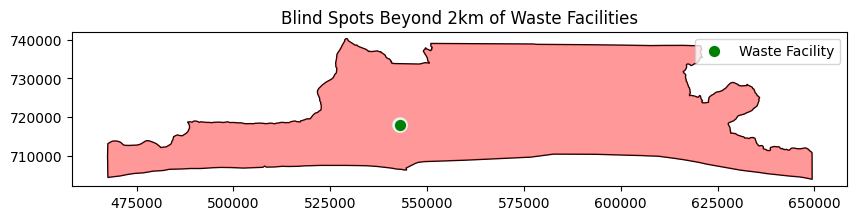

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
lagos_boundary_proj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)
blind_spots_2km.plot(ax=ax, color='red', alpha=0.4, label='Blind Spot (>2km away)')
buffer_gdf_2km.plot(ax=ax, color='lightblue', alpha=0.3, label='2km Buffer')
waste_sites_proj.plot(ax=ax, color='green', markersize=50, label='Waste Facility')

plt.legend()
plt.title("Blind Spots Beyond 2km of Waste Facilities")
plt.show()


In [ ]:
!pip install mapclassify

In [ ]:
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt
import folium
import mapclassify

In [ ]:
# Optional: show all DataFrame columns
pd.set_option("display.max_columns", None)

# ‚úÖ Download boundary for lagos, Nigeria
print("Downloading boundary for lagos, Nigeria...")
lagos = ox.geocoder.geocode_to_gdf("lagos, Nigeria")
print("CRS before reproject:", lagos.crs)
lagos.head()

CRS before reproject: epsg:4326


geometry  bbox_west  bbox_south  \
0  POLYGON ((2.70598 6.42129, 2.70636 6.40298, 2....   2.705985    6.366684   

   bbox_east  bbox_north  place_id  osm_type   osm_id       lat     lon  \
0   4.350906    6.696796  36895467  relation  3718182  6.526903  3.5774   

      class            type  place_rank  importance addresstype         name  \
0  boundary  administrative           8    0.542281        city  Lagos State   

           display_name  
0  Lagos State, Nigeria

In [ ]:
# 2. Fetch territory boundary
print("Downloading boundary for lagos, Nigeria")
lagos = ox.geocoder.geocode_to_gdf("lagos, Nigeria")
# keep geometry in WGS84 for features_from_polygon
print("CRS before reproject:", lagos.crs)
# also prepare metric version later:
lagos_3857 = lagos.to_crs(epsg=3857)
lagos.head()

CRS before reproject: epsg:4326


geometry  bbox_west  bbox_south  \
0  POLYGON ((2.70598 6.42129, 2.70636 6.40298, 2....   2.705985    6.366684   

   bbox_east  bbox_north  place_id  osm_type   osm_id       lat     lon  \
0   4.350906    6.696796  36895467  relation  3718182  6.526903  3.5774   

      class            type  place_rank  importance addresstype         name  \
0  boundary  administrative           8    0.542281        city  Lagos State   

           display_name  
0  Lagos State, Nigeria

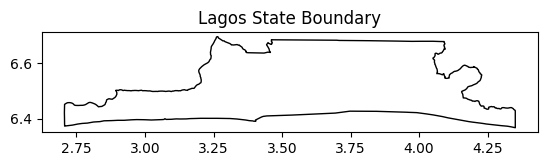

In [ ]:
# Plot the boundary
lagos_boundary.plot(edgecolor='black', facecolor='none')
plt.title("Lagos State Boundary")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

# Optional: list uploaded filenames
for fn in uploaded.keys():
  print(f"Uploaded: {fn}")


Saving recyclers_lagos (2).xlsx to recyclers_lagos (2).xlsx
Uploaded: recyclers_lagos (2).xlsx


In [ ]:
# If headers are in the second row, use header=1
df = pd.read_excel("recyclers_lagos (2).xlsx", header=1)


In [ ]:
# Show all column names
print(df.columns.tolist())

# Show the first 10 rows of key columns
df[["LG/LCDA", "RECYCLERS", "CONTACT", "CRCADDRESS"]].head(10)


['SIN', 'LG/LCDA', 'RECYCLERS', 'CONTACT', 'CRCADDRESS']


LG/LCDA                 RECYCLERS                   CONTACT  \
0      ro-Odofin             RECYCLE POINT                8098002400   
1    Ayobo-Ipaja  BIOSTAR GREEN\nSOLUTIONS                8150423792   
2  Mosan Okunola                       NaN                       NaN   
3       Surulere    WATCO GLOBAL\nSERVICES                8023199565   
4    Coker Aguda                       NaN                       NaN   
5    ltire Ikate                 WECYCLERS  08187764011\n08060368775   
6         Somolu                       NaN                       NaN   
7         Bariga                       NaN                       NaN   
8            Epe                    HORLAG                       NaN   
9          Eredo                       NaN                       NaN   

                                          CRCADDRESS  
0                                    Alakija, Festac  
1  32, Wale Azeez street, Ajasa\nCommand White House  
2                                                NaN  
3  Michael Ogun street, Off itire road,\nObele On...  
4                                                NaN  
5              Adeyole street, liko bustop, Surulere  
6                                                NaN  
7                                                NaN  
8                                                NaN  
9                                                NaN

In [ ]:
# Display all rows (or use df.shape to confirm total)
df[["LG/LCDA", "RECYCLERS", "CONTACT", "CRCADDRESS"]]


LG/LCDA                 RECYCLERS     CONTACT  \
0            ro-Odofin             RECYCLE POINT  8098002400   
1          Ayobo-Ipaja  BIOSTAR GREEN\nSOLUTIONS  8150423792   
2        Mosan Okunola                       NaN         NaN   
3             Surulere    WATCO GLOBAL\nSERVICES  8023199565   
4          Coker Aguda                       NaN         NaN   
..                 ...                       ...         ...   
62              Oriade                       NaN         NaN   
63               Apapa                       NaN         NaN   
64  Ajeromi-\nIfelodun                       NaN         NaN   
65           Oto-Awori                       NaN         NaN   
66                 Ojo                       NaN         NaN   

                                           CRCADDRESS  
0                                     Alakija, Festac  
1   32, Wale Azeez street, Ajasa\nCommand White House  
2                                                 NaN  
3   Michael Ogun street, Off itire road,\nObele On...  
4                                                 NaN  
..                                                ...  
62                                                NaN  
63                                                NaN  
64                                                NaN  
65                                                NaN  
66                                                NaN  

[67 rows x 4 columns]

In [ ]:
# Re-import required libraries after session reset
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Rebuild the address data
raw_text = """
Alakija, Festac
32, Wale Azeez street, Ajasa Command White House
Michael Ogun street, Off itire road, Obele Oniwala, Ojuelegba.
Adeyole street, liko bustop, Surulere
Asuku street, Ijaiye Ojokoro, Lagos
5, Azeez Ashade Close, Along Whispering Palms, Iworo, Badagry, Lagos State.
28 Ojulopesi Street Ijanikin, Badagry Express-Way
159, opposite court of appeal, Lagos.
Langbasa, Okerisan Village by berger bus-stop, Epe
Lanre bus-stop, Igando 2, Akilo street, Ogba
Isacc John street, GRA, Ikeja
Acme Road, Ogba, Ikeja
Isheri-Olofin
Charity bus-stop, Oshodi
Road 5, House 825, Diamond Estate Phase 3, Igando
39, Jamiu Raji Street, Off Cele Egbe bus stop, Ikotun
7/9 Kuburatu Agbedeyi Street, Olokode Bus Stop, Off Nureni Yusuf Road, Kola Alagbado
Idi-Orogbo, Ibeju Lekki
Chevron, Lekki
Kids Beach Garden, Oba Elegushi beach road
62/64 Shagamu Road, Ikorodu, Lagos.
4, Efunga street, Oko Oba, Agege
Plot 21 Amudat Close, off Adu Street, Behind County Hospital, Aguda Ogba, Lagos
1, Bayo Aderiye Street off Jibowu Road, U turn, Abule egba
Popo Williams, Lekki Scheme-2, Sangotedo
"""

clean_addresses = [line.strip() for line in raw_text.strip().split('\n') if len(line.strip()) > 10]
df_addresses_only = pd.DataFrame({"CRC Address": clean_addresses})

# Setup geocoder again
geolocator = Nominatim(user_agent="lagos-recycling-map")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

# Add full address
df_addresses_only["Full Address"] = df_addresses_only["CRC Address"] + ", Lagos, Nigeria"

# Initialize result columns
df_addresses_only["Latitude"] = None
df_addresses_only["Longitude"] = None

# Perform geocoding
for i, row in df_addresses_only.iterrows():
    try:
        location = geocode(row["Full Address"])
        if location:
            df_addresses_only.at[i, "Latitude"] = location.latitude
            df_addresses_only.at[i, "Longitude"] = location.longitude
    except Exception as e:
        continue

# Show geocoded results
df_addresses_only.head(10)


CRC Address  \
0                                    Alakija, Festac   
1   32, Wale Azeez street, Ajasa Command White House   
2  Michael Ogun street, Off itire road, Obele Oni...   
3              Adeyole street, liko bustop, Surulere   
4                Asuku street, Ijaiye Ojokoro, Lagos   
5  5, Azeez Ashade Close, Along Whispering Palms,...   
6  28 Ojulopesi Street Ijanikin, Badagry Express-Way   
7              159, opposite court of appeal, Lagos.   
8  Langbasa, Okerisan Village by berger bus-stop,...   
9       Lanre bus-stop, Igando 2, Akilo street, Ogba   

                                        Full Address Latitude Longitude  
0                    Alakija, Festac, Lagos, Nigeria     None      None  
1  32, Wale Azeez street, Ajasa Command White Hou...     None      None  
2  Michael Ogun street, Off itire road, Obele Oni...     None      None  
3  Adeyole street, liko bustop, Surulere, Lagos, ...     None      None  
4  Asuku street, Ijaiye Ojokoro, Lagos, Lagos, Ni...     None      None  
5  5, Azeez Ashade Close, Along Whispering Palms,...     None      None  
6  28 Ojulopesi Street Ijanikin, Badagry Express-...     None      None  
7  159, opposite court of appeal, Lagos., Lagos, ...     None      None  
8  Langbasa, Okerisan Village by berger bus-stop,...     None      None  
9  Lanre bus-stop, Igando 2, Akilo street, Ogba, ...     None      None

In [ ]:
# Manually adding estimated coordinates from Google Maps for the known recycling addresses in Lagos

data = [
    ("Alakija, Festac", 6.4671, 3.3194),
    ("32, Wale Azeez street, Ajasa Command White House", 6.6097, 3.2763),
    ("Michael Ogun street, Off itire road, Obele Oniwala, Ojuelegba", 6.5103, 3.3619),
    ("Adeyole street, liko bustop, Surulere", 6.5035, 3.3597),
    ("Asuku street, Ijaiye Ojokoro, Lagos", 6.6634, 3.2793),
    ("5, Azeez Ashade Close, Along Whispering Palms, Iworo, Badagry", 6.4160, 2.8487),
    ("28 Ojulopesi Street Ijanikin, Badagry Express-Way", 6.4694, 2.9552),
    ("159, opposite court of appeal, Lagos", 6.4541, 3.4231),
    ("Langbasa, Okerisan Village by berger bus-stop, Epe", 6.5655, 3.9965),
    ("Lanre bus-stop, Igando 2, Akilo street, Ogba", 6.6230, 3.3654),
    ("Isacc John street, GRA, Ikeja", 6.5765, 3.3531),
    ("Acme Road, Ogba, Ikeja", 6.6303, 3.3483),
    ("Isheri-Olofin", 6.6378, 3.3092),
    ("Charity bus-stop, Oshodi", 6.5392, 3.3345),
    ("Road 5, House 825, Diamond Estate Phase 3, Igando", 6.5734, 3.2708),
    ("39, Jamiu Raji Street, Off Cele Egbe bus stop, Ikotun", 6.5672, 3.2687),
    ("7/9 Kuburatu Agbedeyi Street, Kola Alagbado", 6.6402, 3.2887),
    ("Idi-Orogbo, Ibeju Lekki", 6.4501, 3.9174),
    ("Chevron, Lekki", 6.4305, 3.5373),
    ("Kids Beach Garden, Oba Elegushi beach road", 6.4314, 3.4863),
    ("62/64 Shagamu Road, Ikorodu, Lagos", 6.6165, 3.5089),
    ("4, Efunga street, Oko Oba, Agege", 6.6479, 3.3238),
    ("Plot 21 Amudat Close, Behind County Hospital, Aguda Ogba", 6.6287, 3.3450),
    ("1, Bayo Aderiye Street off Jibowu Road, Abule egba", 6.6443, 3.3067),
    ("Popo Williams, Lekki Scheme-2, Sangotedo", 6.4494, 3.6018),
]

# Convert to DataFrame
df_manual_coords = pd.DataFrame(data, columns=["CRC Address", "Latitude", "Longitude"])
df_manual_coords.head()


CRC Address  Latitude  Longitude
0                                    Alakija, Festac    6.4671     3.3194
1   32, Wale Azeez street, Ajasa Command White House    6.6097     3.2763
2  Michael Ogun street, Off itire road, Obele Oni...    6.5103     3.3619
3              Adeyole street, liko bustop, Surulere    6.5035     3.3597
4                Asuku street, Ijaiye Ojokoro, Lagos    6.6634     3.2793

In [ ]:
df_manual_coords[["CRC Address", "Latitude", "Longitude"]].dropna()


CRC Address  Latitude  Longitude
0                                     Alakija, Festac    6.4671     3.3194
1    32, Wale Azeez street, Ajasa Command White House    6.6097     3.2763
2   Michael Ogun street, Off itire road, Obele Oni...    6.5103     3.3619
3               Adeyole street, liko bustop, Surulere    6.5035     3.3597
4                 Asuku street, Ijaiye Ojokoro, Lagos    6.6634     3.2793
5   5, Azeez Ashade Close, Along Whispering Palms,...    6.4160     2.8487
6   28 Ojulopesi Street Ijanikin, Badagry Express-Way    6.4694     2.9552
7                159, opposite court of appeal, Lagos    6.4541     3.4231
8   Langbasa, Okerisan Village by berger bus-stop,...    6.5655     3.9965
9        Lanre bus-stop, Igando 2, Akilo street, Ogba    6.6230     3.3654
10                      Isacc John street, GRA, Ikeja    6.5765     3.3531
11                             Acme Road, Ogba, Ikeja    6.6303     3.3483
12                                      Isheri-Olofin    6.6378     3.3092
13                           Charity bus-stop, Oshodi    6.5392     3.3345
14  Road 5, House 825, Diamond Estate Phase 3, Igando    6.5734     3.2708
15  39, Jamiu Raji Street, Off Cele Egbe bus stop,...    6.5672     3.2687
16        7/9 Kuburatu Agbedeyi Street, Kola Alagbado    6.6402     3.2887
17                            Idi-Orogbo, Ibeju Lekki    6.4501     3.9174
18                                     Chevron, Lekki    6.4305     3.5373
19         Kids Beach Garden, Oba Elegushi beach road    6.4314     3.4863
20                 62/64 Shagamu Road, Ikorodu, Lagos    6.6165     3.5089
21                   4, Efunga street, Oko Oba, Agege    6.6479     3.3238
22  Plot 21 Amudat Close, Behind County Hospital, ...    6.6287     3.3450
23  1, Bayo Aderiye Street off Jibowu Road, Abule ...    6.6443     3.3067
24           Popo Williams, Lekki Scheme-2, Sangotedo    6.4494     3.6018

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Initialize map
m = folium.Map(location=[6.5244, 3.3792], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)

# Add markers to cluster
for _, row in df_manual_coords.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["CRC Address"],
        icon=folium.Icon(color='green', icon='recycle', prefix='fa')
    ).add_to(marker_cluster)

m


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Rebuild GeoDataFrame from your facility coordinates
gdf_facilities = gpd.GeoDataFrame(
    df_manual_coords,
    geometry=gpd.points_from_xy(df_manual_coords["Longitude"], df_manual_coords["Latitude"]),
    crs="EPSG:4326"
)


In [ ]:
gdf_facilities_proj = gdf_facilities.to_crs(epsg=32631)


In [ ]:
# Create unified buffers
buffer_500m = gdf_facilities_proj.buffer(500).unary_union
buffer_1km = gdf_facilities_proj.buffer(1000).unary_union
buffer_2km = gdf_facilities_proj.buffer(2000).unary_union

# Convert to GeoDataFrames
buffer_gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=32631)
buffer_gdf_1km = gpd.GeoDataFrame(geometry=[buffer_1km], crs=32631)
buffer_gdf_2km = gpd.GeoDataFrame(geometry=[buffer_2km], crs=32631)


<ipython-input-44-06e32b298e71>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_500m = gdf_facilities_proj.buffer(500).unary_union
<ipython-input-44-06e32b298e71>:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_1km = gdf_facilities_proj.buffer(1000).unary_union
<ipython-input-44-06e32b298e71>:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_2km = gdf_facilities_proj.buffer(2000).unary_union


In [ ]:
import osmnx as ox

tags = {"building": "residential"}
bldgs = ox.features_from_polygon(lagos_boundary.geometry.iloc[0], tags)
bldgs = bldgs.to_crs(epsg=32631)


In [ ]:
bldgs["area_m2"] = bldgs.geometry.area
bldgs["levels"] = bldgs.get("building:levels", 1).fillna(1)
bldgs["levels"] = bldgs["levels"].astype(str).str.extract(r"(\d+)").fillna(1).astype(float)
bldgs["living_area"] = bldgs["area_m2"] * bldgs["levels"] * 0.8
bldgs["population"] = (bldgs["living_area"] / 31).astype(int)


In [ ]:
# Filter only polygonal buildings (exclude points/lines)
bldgs = bldgs[bldgs.geometry.geom_type.isin(["Polygon", "MultiPolygon"])]


In [ ]:
pop_500m = gpd.overlay(bldgs, buffer_gdf_500m, how='intersection')["population"].sum()
pop_1km = gpd.overlay(bldgs, buffer_gdf_1km, how='intersection')["population"].sum()
pop_2km = gpd.overlay(bldgs, buffer_gdf_2km, how='intersection')["population"].sum()

print(f"üë• Population within 500m: {pop_500m:,}")
print(f"üë• Population within 1km:  {pop_1km:,}")
print(f"üë• Population within 2km:  {pop_2km:,}")


üë• Population within 500m: 297
üë• Population within 1km:  1,781
üë• Population within 2km:  7,144


In [ ]:
import osmnx as ox

# Search query: LGAs in Lagos State (admin_level=7 or 8)
tags = {"boundary": "administrative", "admin_level": ["7", "8"]}

# Use the Lagos boundary you already have
lagos_polygon = lagos_boundary.geometry.iloc[0]  # reuse this

# Fetch all sub-administrative areas (LGAs/LCDA)
lagos_lga_gdf = ox.features.features_from_polygon(lagos_polygon, tags=tags)
lagos_lga_gdf = lagos_lga_gdf.to_crs(epsg=32631)

# Preview
lagos_lga_gdf.head()



geometry  \
element  id                                                           
relation 192784   POLYGON ((259495.64 1180192.566, 259439.819 11...   
         192787   POLYGON ((465883.469 868316.576, 465824.905 86...   
         2848208  POLYGON ((432187.348 766134.79, 433613.661 768...   
         2945793  POLYGON ((442432.054 706828.829, 442221.162 70...   
         3718182  POLYGON ((467565.306 713108.577, 468288.583 71...   

                 admin_level         name       name:ar  name:de  \
element  id                                                        
relation 192784            2        B√©nin          ÿ®ŸÜŸäŸÜ    Benin   
         192787            2      Nigeria       ŸÜŸäÿ¨Ÿäÿ±Ÿäÿß  Nigeria   
         2848208           4        Ou√©m√©  ÿ•ÿØÿßÿ±ÿ© ÿ£ŸàŸäŸÖŸäŸá    Ou√©m√©   
         2945793           6  S√®m√®-Kpodji           NaN      NaN   
         3718182           4        Lagos         ŸÑÿßÿ∫Ÿàÿ≥    Lagos   

                           name:en name:ko  name:ru  name:uk      name:yo  \
element  id                                                                 
relation 192784              Benin      Î≤†ÎÉâ    –ë–µ–Ω–∏–Ω   –ë–µ–Ω—ñÃÅ–Ω        Benin   
         192787            Nigeria   ÎÇòÏù¥ÏßÄÎ¶¨ÏïÑ  –ù–∏–≥–µ—Ä–∏—è  –ù—ñ–≥–µ—Ä—ñ—è     N√†√¨j√≠r√≠√†   
         2848208  Ou√©m√© Department    Ïö∞ÏóêÎ©îÏ£º     –£—ç–º–µ     –í–µ–º–µ    Ap√° Ou√©m√©   
         2945793               NaN     NaN      NaN      NaN          NaN   
         3718182       Lagos State    ÎùºÍ≥†Ïä§Ï£º    –õ–∞–≥–æ—Å    –õ–∞–≥–æ—Å  √åp√≠nl·∫πÃÄ √àk√≥   

                      name:zh place  wikidata       wikipedia name:ckb  \
element  id                                                              
relation 192784       Ë¥ùÂÆÅ / Ë≤ùÂçó   NaN      Q962        fr:B√©nin    ÿ®€éŸÜ€åŸÜ   
         192787   Â∞ºÊó•Âà©‰∫ö / Â•àÂèäÂà©‰∫û   NaN     Q1033      en:Nigeria  ŸÜ€éÿ¨€åÿ±€åÿß   
         2848208          ÈüãÊ¢ÖÁúÅ   NaN    Q29169        fr:Ou√©m√©      NaN   
         2945793          NaN   NaN  Q2100355  en:S√®m√®-Kpodji      NaN   
         3718182          ÊãâÂì•ÊñØ  city   Q815913  en:Lagos State      NaN   

                  name:el  name:eo                name:es        name:fr  \
element  id                                                                
relation 192784    ŒúœÄŒµŒΩŒØŒΩ   Benino                  Ben√≠n          B√©nin   
         192787   ŒùŒπŒ≥Œ∑œÅŒØŒ±  Niƒùerio                Nigeria        Nig√©ria   
         2848208      NaN      NaN  Departamento de Ou√©m√©          Ou√©m√©   
         2945793      NaN      NaN                    NaN    S√®m√®-Kpodji   
         3718182      NaN      NaN        Estado de Lagos  √âtat de Lagos   

                      name:hi   name:hr                name:it  name:kn  \
element  id                                                               
relation 192784         ‡§¨‡•á‡§®‡§ø‡§®     Benin                  Benin   ‡≤¨‡≥Ü‡≤®‡≤ø‡≤®‡≥ç   
         192787     ‡§®‡§æ‡§à‡§ú‡•Ä‡§∞‡§ø‡§Ø‡§æ  Nigerija                Nigeria  ‡≤®‡≥à‡≤ú‡≥Ä‡≤∞‡≤ø‡≤Ø   
         2848208          NaN       NaN  Dipartimento di Ou√©m√©      NaN   
         2945793          NaN       NaN                    NaN      NaN   
         3718182  ‡§≤‡•á‡§ó‡•ã‡§∏ ‡§∞‡§æ‡§ú‡•ç‡§Ø       NaN                  Lagos      NaN   

                  name:nl  name:no  name:oc            name:pl  name:pt  \
element  id                                                               
relation 192784     Benin    Benin    Benin              Benin    Benim   
         192787   Nigeria  Nigeria  Nig√®ria            Nigeria  Nig√©ria   
         2848208    Ou√©m√©    Ou√©m√©      NaN  Departament Ou√©m√©    Ou√©m√©   
         2945793      NaN      NaN      NaN                NaN      NaN   
         3718182    Lagos    Lagos      NaN              Lagos    Lagos   

                  name:sv           name:tr name:zh-Hans name:zh-Hant name:am  \
element  id                                                             

<ipython-input-66-096dd46de7a6>:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


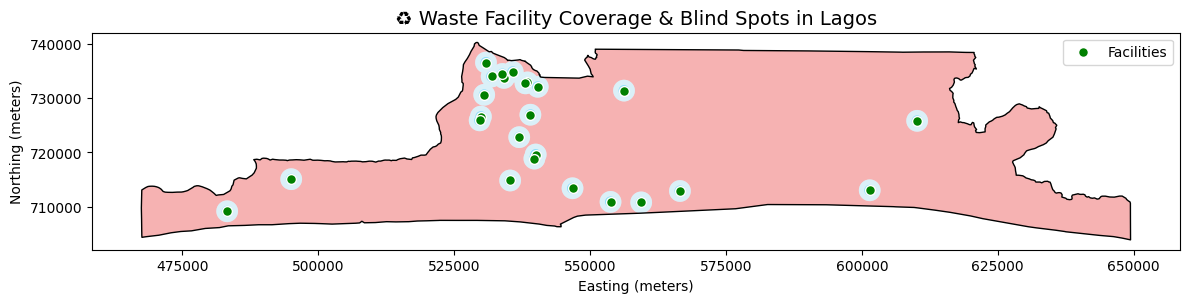

In [ ]:
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots(figsize=(12, 4))

# 1. Blind Spots
blind_spots.plot(ax=ax, color='lightcoral', alpha=0.6, label='Blind Spots (>2km)')

# 2. Buffers
buffer_gdf_2km.plot(ax=ax, color='skyblue', alpha=0.3, label='2km Buffer')
buffer_gdf_1km.plot(ax=ax, color='deepskyblue', alpha=0.4, label='1km Buffer')
buffer_gdf_500m.plot(ax=ax, color='blue', alpha=0.5, label='500m Buffer')

# 3. Facilities
gdf_facilities_proj.plot(ax=ax, color='green', edgecolor='white', markersize=50, label='Facilities')

# 4. Lagos boundary outline
lagos_boundary_proj.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# ‚úÖ Keep axis ticks (don't turn them off)
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")

# Title and Legend
plt.title("‚ôªÔ∏è Waste Facility Coverage & Blind Spots in Lagos", fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()



In [ ]:
# Reproject to metric CRS (EPSG:32631)
bldgs_proj = bldgs.to_crs(epsg=32631)


In [ ]:
# 500m zone
pop_500m = gpd.overlay(bldgs_proj, buffer_gdf_500m, how='intersection')["population"].sum()

# 1km zone
pop_1km = gpd.overlay(bldgs_proj, buffer_gdf_1km, how='intersection')["population"].sum()

# 2km zone
pop_2km = gpd.overlay(bldgs_proj, buffer_gdf_2km, how='intersection')["population"].sum()


In [ ]:
print("üìç Population living near waste management facilities:")
print(f"‚û°Ô∏è Within 500 meters: {pop_500m:,.0f} people")
print(f"‚û°Ô∏è Within 1 km:        {pop_1km:,.0f} people")
print(f"‚û°Ô∏è Within 2 km:        {pop_2km:,.0f} people")


üìç Population living near waste management facilities:
‚û°Ô∏è Within 500 meters: 297 people
‚û°Ô∏è Within 1 km:        1,781 people
‚û°Ô∏è Within 2 km:        7,144 people
